In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import math
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [2]:
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

#print and store label names of data for reference
print(df.columns)
names = df.columns
print(names[0])

#applies log to luminosity to make the data more linear
for i in range(240):
    df[names[1]][i] = math.log(df[names[1]][i])

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')
Temperature (K)
     Temperature (K)
0               3068
1               3042
2               2600
3               2800
4               1939
..               ...
235            38940
236            30839
237             8829
238             9235
239            37882

[240 rows x 1 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [3]:
#graph the stars with the corresponding x and y axes, and color according to star type
def graph(xLabel, yLabel, colorGroups):
    arr = df[colorGroups]
    plt.scatter(df[xLabel], df[yLabel], c=arr)

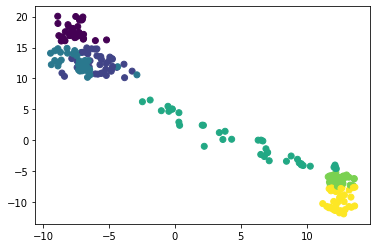

In [4]:
#graph luminosity vs absolute magnitude
graph(names[1], names[3], names[4])
plt.show()

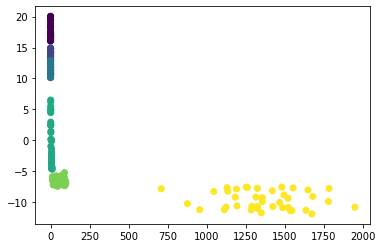

In [5]:
#graph radius vs absolute magnitude
graph(names[2], names[3], names[4])
plt.show()

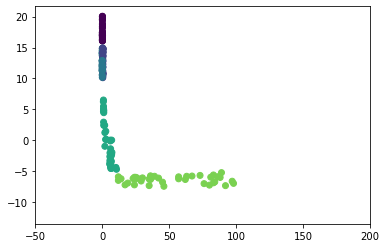

In [6]:
#certain subsection of radius vs absolute magnitude
graph(names[2], names[3], names[4])
plt.xlim(-50, 200)
plt.show()

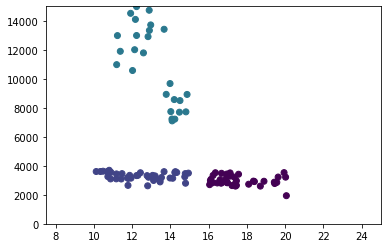

In [7]:
#graph absolute magnitude vs temperature
graph(names[3], names[0], names[4])
plt.xlim(7.5, 25)
plt.ylim(0, 15000)
plt.show()

In [8]:
#classify stars based on data from graphs
def classify(starData):
    if(starData[names[2]] >= 500):
        return 5
    if(starData[names[2]] >= 20):
        return 4
    if(starData[names[3]] < -5):
        return 4
    if(starData[names[3]] < 7.5):
        return 3
    if(starData[names[3]] > 15.5):
        return 0
    if(starData[names[0]] > 5000):
        return 2
    return 1

In [9]:
#tests accuracy of classifier function based on data
def testAccuracy():
    corr = 0
    tot = 0
    for i in df.iterrows():
        x = classify(i[1])
        tot = tot+1
        if x==(i[1][names[4]]):
            corr=corr+1
    return (corr/tot)

In [10]:
testAccuracy()

1.0